## 1.Download and unzip dataset

In [ ]:
import zipfile

# Download zip file 
!wget https://www.dropbox.com/s/32tnt81asbult2c/ASL_dataset.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("ASL_dataset.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-26 01:39:33--  https://www.dropbox.com/s/32tnt81asbult2c/ASL_dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/32tnt81asbult2c/ASL_dataset.zip [following]
--2021-08-26 01:39:33--  https://www.dropbox.com/s/raw/32tnt81asbult2c/ASL_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20ecfc0948b0f04f4885a4fbfc.dl.dropboxusercontent.com/cd/0/inline/BU6jnZ7XhjICh0u04Lv9_l5TrpaqdL1GX1CHrlvOdhKamWPymtiegvUiecbnAZYaRXl26n3uywmpQ3soTj08wTWqN2at0GjVGO26l4YLEjVX0rzNAI2wYPi1qKR63NCHeCy6PziDVFpL9zUR9fMIPVA5/file# [following]
--2021-08-26 01:39:34--  https://uc20ecfc0948b0f04f4885a4fbfc.dl.dropboxusercontent.com/cd/0/inline/BU6jnZ7XhjICh0u04Lv9_l5TrpaqdL1GX1CHrlvOdhKamWPymtiegvUiecbnAZYaRXl26n3uywmpQ3soT

## 2.Visualize dataset

In [ ]:
import os, pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from shutil import copyfile
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array


for dirpath,dirnames, filenames in os.walk("ASL_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

# created a list of labels from subdirectory 
print("\n")
print("created a list of labels from subdirectory")
data_dir = pathlib.Path("ASL_dataset")
labels = np.array(
    sorted([item.name for item in data_dir.glob("*")]))
print(labels)

There are 29 directories and 0 images in ASL_dataset
There are 0 directories and 3000 images in ASL_dataset/Y
There are 0 directories and 3000 images in ASL_dataset/del
There are 0 directories and 3000 images in ASL_dataset/V
There are 0 directories and 3000 images in ASL_dataset/N
There are 0 directories and 3000 images in ASL_dataset/Q
There are 0 directories and 3000 images in ASL_dataset/S
There are 0 directories and 3000 images in ASL_dataset/G
There are 0 directories and 3000 images in ASL_dataset/A
There are 0 directories and 3000 images in ASL_dataset/B
There are 0 directories and 3000 images in ASL_dataset/W
There are 0 directories and 3000 images in ASL_dataset/P
There are 0 directories and 3000 images in ASL_dataset/X
There are 0 directories and 3000 images in ASL_dataset/I
There are 0 directories and 3000 images in ASL_dataset/M
There are 0 directories and 3000 images in ASL_dataset/J
There are 0 directories and 3000 images in ASL_dataset/K
There are 0 directories and 3000 

## 3.Get helper_fucntions

In [ ]:
!wget https://raw.githubusercontent.com/phuongngo2904/Senior_Project/main/code/helper_funcs/helper_functions.py
from helper_functions import *

--2021-08-26 01:40:26--  https://raw.githubusercontent.com/phuongngo2904/Senior_Project/main/code/helper_funcs/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2100 (2.1K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.05K  --.-KB/s    in 0s      

2021-08-26 01:40:28 (38.8 MB/s) - ‘helper_functions.py’ saved [2100/2100]



## 4.View images from dataset

['A45.jpg']
Image Shape: (200, 200, 3)
['B2217.jpg']
Image Shape: (200, 200, 3)
['C2770.jpg']
Image Shape: (200, 200, 3)
['D2588.jpg']
Image Shape: (200, 200, 3)
['E2938.jpg']
Image Shape: (200, 200, 3)
['F963.jpg']
Image Shape: (200, 200, 3)
['G1647.jpg']
Image Shape: (200, 200, 3)
['H1546.jpg']
Image Shape: (200, 200, 3)
['I1356.jpg']
Image Shape: (200, 200, 3)
['J2756.jpg']
Image Shape: (200, 200, 3)
['K78.jpg']
Image Shape: (200, 200, 3)
['L2849.jpg']
Image Shape: (200, 200, 3)
['M1050.jpg']
Image Shape: (200, 200, 3)
['N1249.jpg']
Image Shape: (200, 200, 3)
['O545.jpg']
Image Shape: (200, 200, 3)
['P2284.jpg']
Image Shape: (200, 200, 3)
['Q938.jpg']
Image Shape: (200, 200, 3)
['R978.jpg']
Image Shape: (200, 200, 3)
['S2893.jpg']
Image Shape: (200, 200, 3)
['T2646.jpg']
Image Shape: (200, 200, 3)
['U1946.jpg']
Image Shape: (200, 200, 3)
['V1236.jpg']
Image Shape: (200, 200, 3)
['W719.jpg']
Image Shape: (200, 200, 3)
['X2529.jpg']
Image Shape: (200, 200, 3)
['Y1814.jpg']
Image Shape

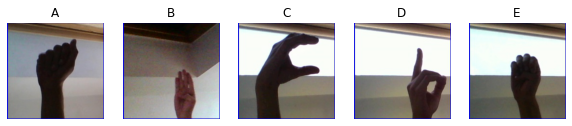

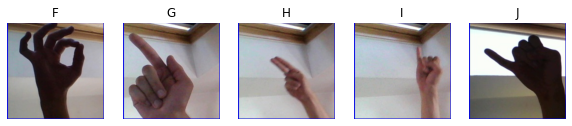

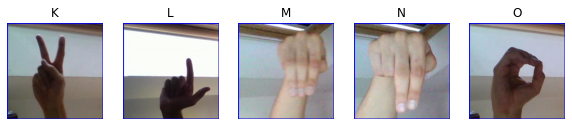

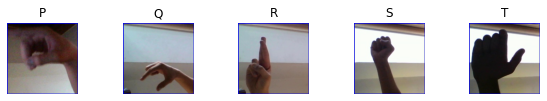

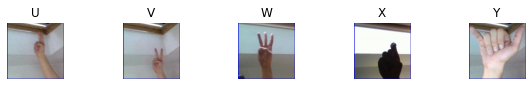

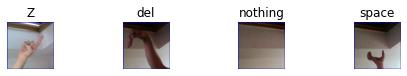

In [ ]:
index,row,column = 1,1,5
plt.figure(figsize=(10, 6))

for x in labels:
    plt.subplot(row,column,index)
    img = view_random_image("ASL_dataset",x)
    if index == 5:
        plt.figure(figsize=(10, 6))
        row += 1
        index = 1
    else: index += 1

## 5.Split data into 2 subsets: train, validation

In [ ]:
train_set = {}
validation_set = {}
test_set = {}
num_labels = len(labels)
data_set_path = "ASL_dataset/"
for i in os.listdir(data_set_path):
    #print(i)
    temp_dir = os.path.join(data_set_path, i) # e.g. data_set_path/'A'
    temp_files = os.listdir(temp_dir)
    
    # train_list is 90% of the data, test_valid_list is 10% of the data
    train_list , validation_list = train_test_split(temp_files, test_size = 0.1)
    
    train_set[i] = train_list
    validation_set[i] = validation_list

## 6.Creating a list of filename for training set, validation set

In [ ]:
# data_set_path = "ASL_alphabet_common_phrase/"
for i in tqdm(train_set.keys()):
    temp_dir = os.path.join(data_set_path, 'training_set', 'label_' + str(i))
    #temp_dir is ASL_alphabet_common_phrase/training_set/label_A
    
    os.makedirs(temp_dir)
    for file in train_set[str(i)]:
        # src path is data_set_path/'A'/file
        src = os.path.join(data_set_path, str(i), file)
        
        # dest path is data_set_path/'training_set'/'label_'
        # to accomodate for the directory format required by flow_from_directory method in keras
        dest = os.path.join(temp_dir, file)
        copyfile(src, dest)

for i in tqdm(validation_set.keys()):
    temp_dir = os.path.join(data_set_path, 'validation_set', 'label_' + str(i))
    #temp_dir is ASL_dataset/validation_set/label_A
    
    os.makedirs(temp_dir)
    for file in validation_set[str(i)]:
        # src path is data_set_path/'A'/file
        src = os.path.join(data_set_path, str(i), file)
        
        # dest path is data_set_path/'validation_set'/'label_'
        # to accomodate for the directory format required by flow_from_directory method in keras
        dest = os.path.join(temp_dir, file)
        copyfile(src, dest)

100%|██████████| 29/29 [00:00<00:00, 34.33it/s]


## 7.Prepare data before trainning

In [ ]:
IMG_SIZE=(64,64) 
b_size = 64
datagen = ImageDataGenerator(rescale=1/255.,
                                  samplewise_center=True, 
                                  samplewise_std_normalization=True,
                                  brightness_range=[0.8, 3.0],
                                  zoom_range=[0.8,1.0]        
)

# data_set_path = "ASL_dataset/"
training_data = datagen.flow_from_directory(os.path.join(data_set_path, 'training_set'),
                                                 target_size = IMG_SIZE,
                                                 batch_size = b_size,
                                                 shuffle=True,
                                                 seed = 13,
                                                 class_mode = 'categorical')

validation_data = datagen.flow_from_directory(os.path.join(data_set_path, 'validation_set'),
                                                 target_size = IMG_SIZE,
                                                 batch_size = b_size,
                                                 shuffle=True,
                                                 seed = 13,
                                                 class_mode = 'categorical')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


## 7.1.Download test set

In [ ]:
# Download zip file 
!wget https://www.dropbox.com/s/c2he5ssk1rejsyk/ASL_test.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("ASL_test.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-26 01:40:43--  https://www.dropbox.com/s/c2he5ssk1rejsyk/ASL_test.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c2he5ssk1rejsyk/ASL_test.zip [following]
--2021-08-26 01:40:43--  https://www.dropbox.com/s/raw/c2he5ssk1rejsyk/ASL_test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1196f89fcbe3b999405d656f9d.dl.dropboxusercontent.com/cd/0/inline/BU4Sr1KYr-p3yD29uWe4I_VnZ2sgkZkmw0daL9ox8_D6RYp3tkK1OHVPfoILII3jbeMPdMrNgN0vCSWFDPMq-1B9EarHP-75UCTWGNGSiKObeTMV_FFzkDYOoiazVHoz43CYRX0iwd87Cf_tmsxhblGr/file# [following]
--2021-08-26 01:40:43--  https://uc1196f89fcbe3b999405d656f9d.dl.dropboxusercontent.com/cd/0/inline/BU4Sr1KYr-p3yD29uWe4I_VnZ2sgkZkmw0daL9ox8_D6RYp3tkK1OHVPfoILII3jbeMPdMrNgN0vCSWFDPMq-1B9Ea

## 8.1.Create callback class

In [ ]:
# Creating a callback to stop model training after reaching a threshold accuracy
import tensorflow as tf
ACCURACY = 0.98

class ModelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #print( logs.get('val_accuracy'))
    #print(f"type is {type(logs.get('val_accuracy'))}")
    if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None and logs.get('accuracy') > ACCURACY and logs.get('val_accuracy') > ACCURACY:
      print("\nReached", ACCURACY * 100, "accuracy, Stopping!")
      self.model.stop_training = True

callback = ModelCallback()

## 8.2.Create a model

In [ ]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization

model = Sequential([

    Conv2D(filters = 64 , kernel_size = 5, padding = 'same',input_shape=(64,64,3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.20),

    Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.20),

    Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.20),

    Conv2D(filters = 512 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 512 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(filters = 512 , kernel_size = 5, padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.20),

    Flatten(),
    Dense(units=1024,activation='relu'),
    Dense(units=256,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(num_labels, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit_generator(training_data,
                         steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),
                         epochs = 100,
                         validation_data = validation_data,
                         validation_steps = math.ceil(validation_data.n / validation_data.batch_size),
                         callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1224/1224 [==============================] - 241s 182ms/step - loss: 2.2600 - accuracy: 0.3217 - val_loss: 0.6427 - val_accuracy: 0.7775
Epoch 2/100
1224/1224 [==============================] - 218s 178ms/step - loss: 0.3806 - accuracy: 0.8714 - val_loss: 0.2545 - val_accuracy: 0.9222
Epoch 3/100
1224/1224 [==============================] - 215s 176ms/step - loss: 0.1707 - accuracy: 0.9457 - val_loss: 0.1257 - val_accuracy: 0.9607
Epoch 4/100
1224/1224 [==============================] - 217s 177ms/step - loss: 0.1187 - accuracy: 0.9652 - val_loss: 0.1194 - val_accuracy: 0.9653
Epoch 5/100
1224/1224 [==============================] - 217s 177ms/step - loss: 0.0982 - accuracy: 0.9714 - val_loss: 0.0706 - val_accuracy: 0.9771
Epoch 6/100
1224/1224 [==============================] - 217s 177ms/step - loss: 0.0753 - accuracy: 0.9795 - val_loss: 0.1200 - val_accuracy: 0.9649
Epoch 7/100
1224/1224 [==============================] - 217s 177ms/step - loss: 0.0719 - accuracy: 0.9812

## 9.Loss and accuracy

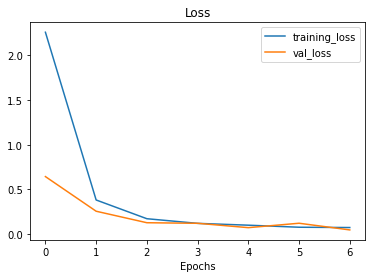

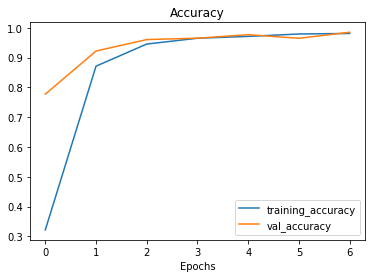

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history)

## 10.Testing model with random images

Actual class: A 
 Predicted class: A


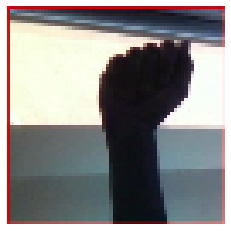

Actual class: B 
 Predicted class: B


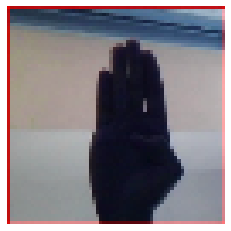

Actual class: R 
 Predicted class: R


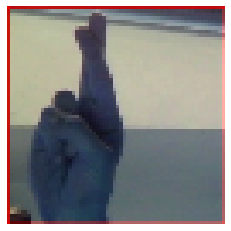

Actual class: Y 
 Predicted class: Y


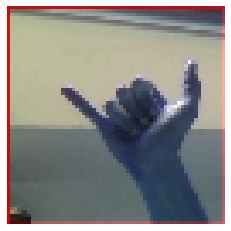

Actual class: K 
 Predicted class: K


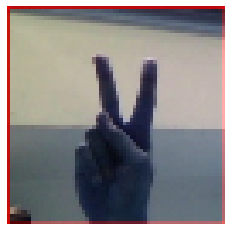

Actual class: N 
 Predicted class: N


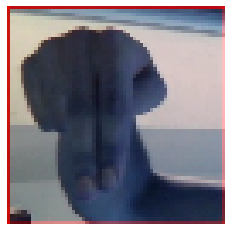

Actual class: Q 
 Predicted class: Q


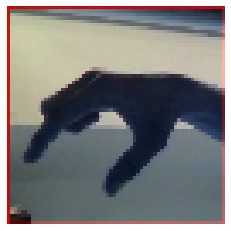

Actual class: E 
 Predicted class: E


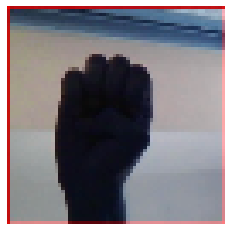

Actual class: L 
 Predicted class: L


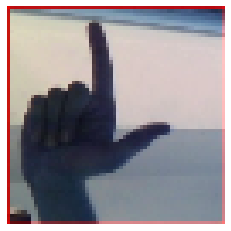

Actual class: S 
 Predicted class: S


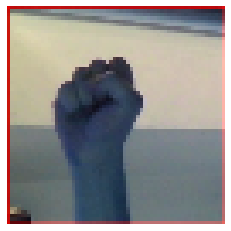

Actual class: U 
 Predicted class: U


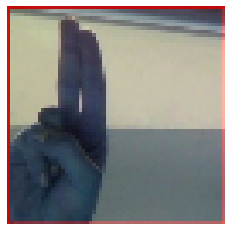

Actual class: D 
 Predicted class: D


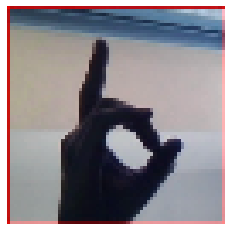

Actual class: T 
 Predicted class: T


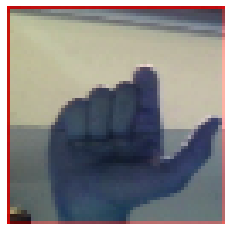

Actual class: P 
 Predicted class: P


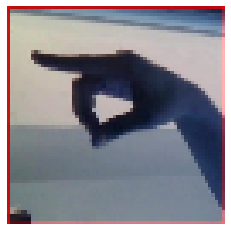

Actual class: V 
 Predicted class: V


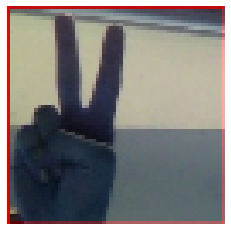

Actual class: J 
 Predicted class: J


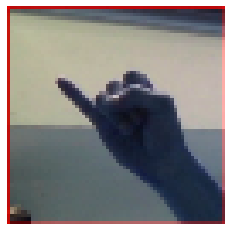

Actual class: I 
 Predicted class: I


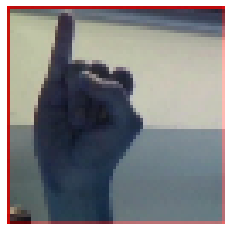

Actual class: nothing 
 Predicted class: nothing


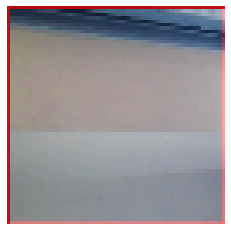

Actual class: C 
 Predicted class: C


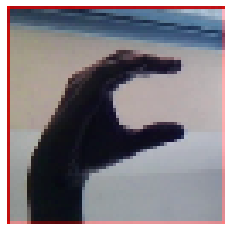

Actual class: H 
 Predicted class: H


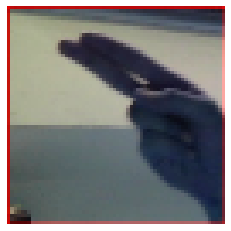

Actual class: Z 
 Predicted class: Z


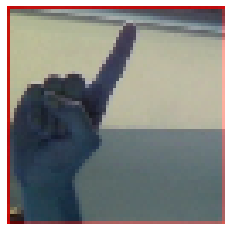

Actual class: W 
 Predicted class: W


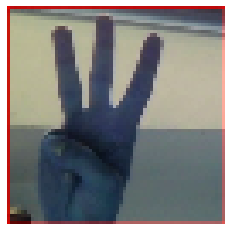

Actual class: X 
 Predicted class: X


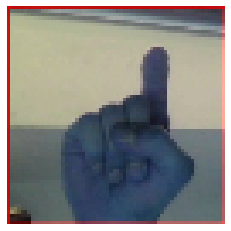

Actual class: O 
 Predicted class: O


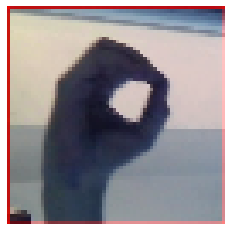

Actual class: F 
 Predicted class: F


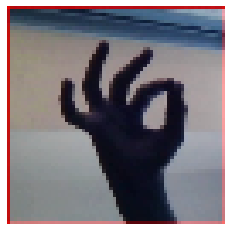

Actual class: G 
 Predicted class: G


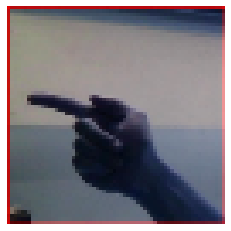

Actual class: space 
 Predicted class: space


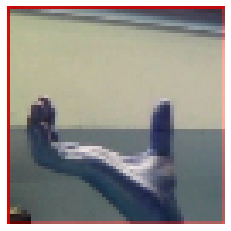

Actual class: M 
 Predicted class: M


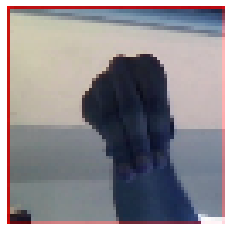

In [ ]:
TEST_DIR = "ASL_test/"
def test_model_w_images(model, TEST_DIR):
  IMAGE_SIZE = 64
  for test_image in (os.listdir(TEST_DIR)):
    #random_img = random.sample(os.listdir(TEST_DIR+ "/" + test_image),1)
    path = TEST_DIR + "/" + test_image
    #print(path)
    img = cv2.imread(path)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    plt.figure()
    plt.axis('Off')
    plt.imshow(img) 
    img = np.array(img) / 255.
    img = img.reshape((1, IMAGE_SIZE, IMAGE_SIZE, 3))
    #print(img.shape)
    img = datagen.standardize(img) 
    prediction = np.array(model.predict(img))
    actual = test_image.split('_')[0]
    predicted = labels[prediction.argmax()]
    print('Actual class: {} \n Predicted class: {}'.format(actual, predicted)) 
    plt.show()
test_model_w_images(model,TEST_DIR)

## 11.Save model

In [ ]:
model.save("gesture_regconition_model_4.h5")